In [1]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr
from tqdm import tqdm
import pandas as pd
import re

In [2]:
isc_result_folder_path = '../data/01_isc_results/'
files = sorted(os.listdir(isc_result_folder_path))
files[:3]

['isc_task-s01e01a.npy', 'isc_task-s01e01b.npy', 'isc_task-s01e02a.npy']

In [3]:
isc_results = []
for current_file in files:
    f_to_load = isc_result_folder_path + current_file
    isc_results.append(np.load(f_to_load))

isc_results = np.asarray(isc_results)
isc_results.shape

(280, 1000)

(0.0, 0.5)

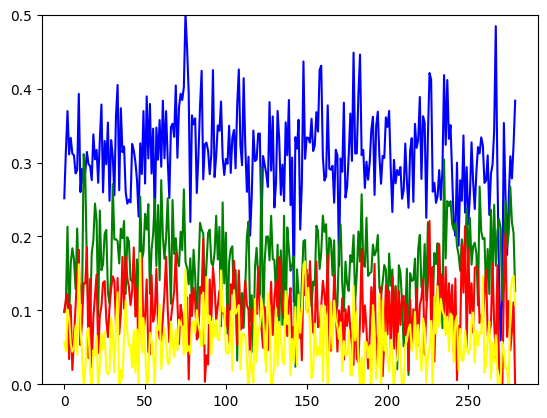

In [4]:
plt.plot(isc_results[:, 598], 'blue')
plt.plot(isc_results[:, 545], 'green')
plt.plot(isc_results[:, 920], 'red')
plt.plot(isc_results[:, 150], 'yellow')

plt.ylim([0, 0.5])

In [5]:
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(isc_results[:, 920], 0)
t_statistic
p_value

2.3111427452758844e-110

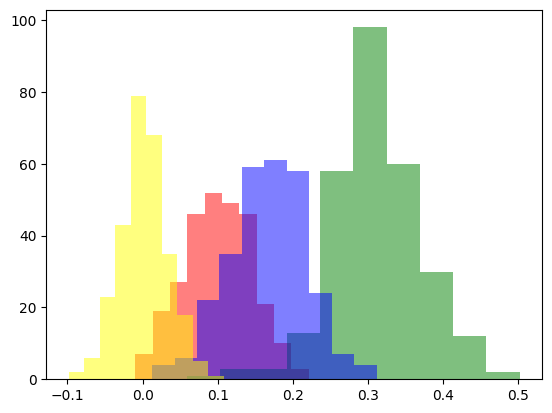

In [6]:
plt.hist(isc_results[:, 920], color = 'red', alpha = 0.5);
plt.hist(isc_results[:, 598], color = 'green', alpha = 0.5);
plt.hist(isc_results[:, 545], color = 'blue', alpha = 0.5);
plt.hist(isc_results[:, 820], color = 'yellow', alpha = 0.5);

<Axes: >

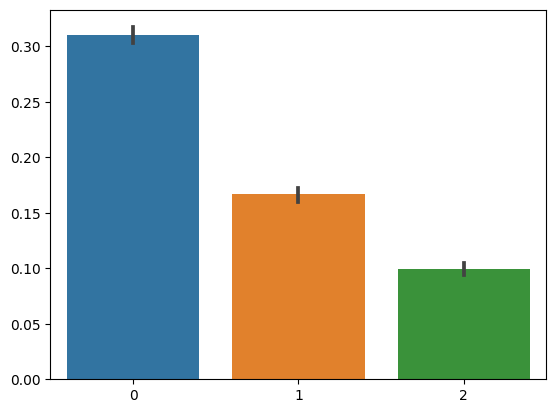

In [13]:
roi_labels = [ 'auditory cortex',  'visual cortex', 'TPJ',]
roi_nums = [598, 545, 920]   # 598 auditory   # 920 tpj    545 visual
selection = isc_results[:, roi_nums]
sel_df = pd.DataFrame(selection)
import seaborn as sns

sns.barplot(sel_df)

### Plot

In [16]:
schaefer = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
schaefer_rois_file       = schaefer['maps']

# set up mask
mask = Brain_Data(schaefer['maps'])
mask_x = expand_mask(mask)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


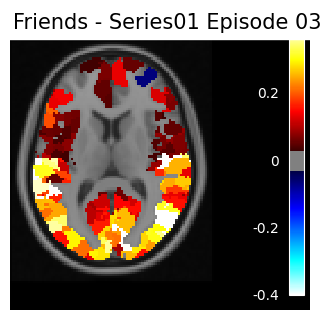

In [22]:
one_isc_result = isc_results[0, :]
#one_isc_result = np.reshape(one_isc_result, (1000,1))
one_isc_result.shape

isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
fig = plt.figure(figsize=(3, 3))
nilearn.plotting.plot_stat_map(    isc_r_brain, 
                                       bg_img       = '../data/MNI152_T1_2mm.nii.gz',
                                       threshold    = 0.03,  #additional threshold for visualization
                                       vmax         = 0.4, 
                                       draw_cross   = False,
                                       display_mode = 'z',
                                       cut_coords   = [10],
                                       annotate     = False,
                                       figure = fig,
                                       title = 'Friends - Series01 Episode 03');

In [43]:
files[48:96:2]

['isc_task-s02e01a.npy',
 'isc_task-s02e02a.npy',
 'isc_task-s02e03a.npy',
 'isc_task-s02e04a.npy',
 'isc_task-s02e05a.npy',
 'isc_task-s02e06a.npy',
 'isc_task-s02e07a.npy',
 'isc_task-s02e08a.npy',
 'isc_task-s02e09a.npy',
 'isc_task-s02e10a.npy',
 'isc_task-s02e11a.npy',
 'isc_task-s02e12a.npy',
 'isc_task-s02e13a.npy',
 'isc_task-s02e14a.npy',
 'isc_task-s02e15a.npy',
 'isc_task-s02e16a.npy',
 'isc_task-s02e17a.npy',
 'isc_task-s02e18a.npy',
 'isc_task-s02e19a.npy',
 'isc_task-s02e20a.npy',
 'isc_task-s02e21a.npy',
 'isc_task-s02e22a.npy',
 'isc_task-s02e23a.npy',
 'isc_task-s02e24a.npy']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


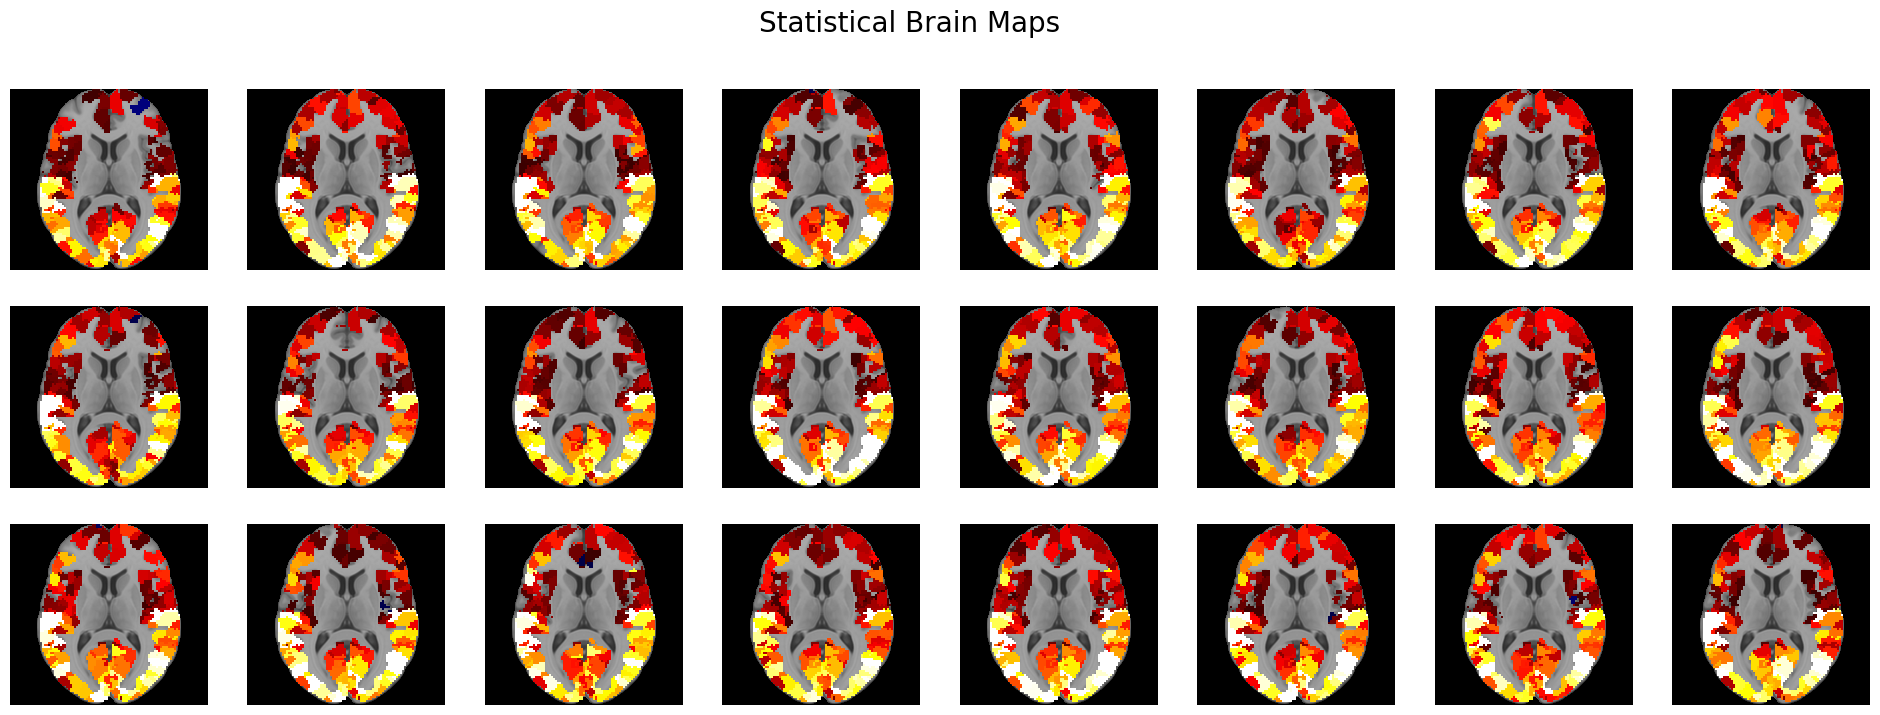

In [41]:
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np

isc_results2 = isc_results[0:48:2, :] 

# Example: Load MNI template as background (use your own)
bg_img = datasets.load_mni152_template()

# Placeholder: list of 25 brain images (stat maps)
# Replace these with your actual NIfTI files or Nifti1Image objects

# Set up a 5x5 grid of matplotlib axes
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

# Loop and plot each map
for i, ax in enumerate(axes):
    print(i)
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

# Avoid overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np

isc_results2 = isc_results[0:48:2, :] 

# Example: Load MNI template as background (use your own)
bg_img = datasets.load_mni152_template()

# Placeholder: list of 25 brain images (stat maps)
# Replace these with your actual NIfTI files or Nifti1Image objects

# Set up a 5x5 grid of matplotlib axes
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

# Loop and plot each map
for i, ax in enumerate(axes):
    print(i)
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

# Avoid overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Text(0.5, 1.0, 'ISC in TPJ in red and Visual Cortex in green and Auditory Cortex in blue')

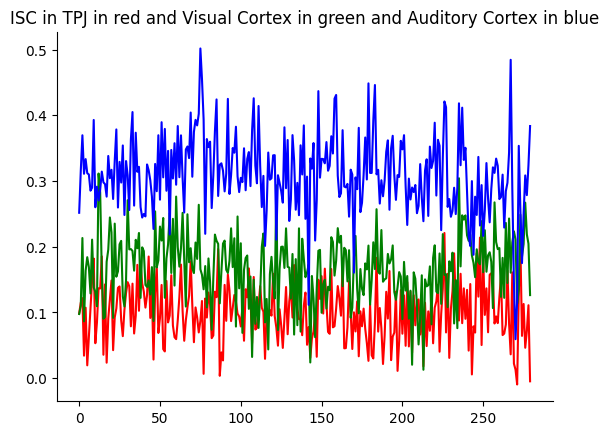

In [99]:
plt.plot(isc_results[:, 920], 'red')
plt.plot(isc_results[:, 545], 'green')
plt.plot(isc_results[:, 598], 'blue')

sns.despine()
plt.title('ISC in TPJ in red and Visual Cortex in green and Auditory Cortex in blue')

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



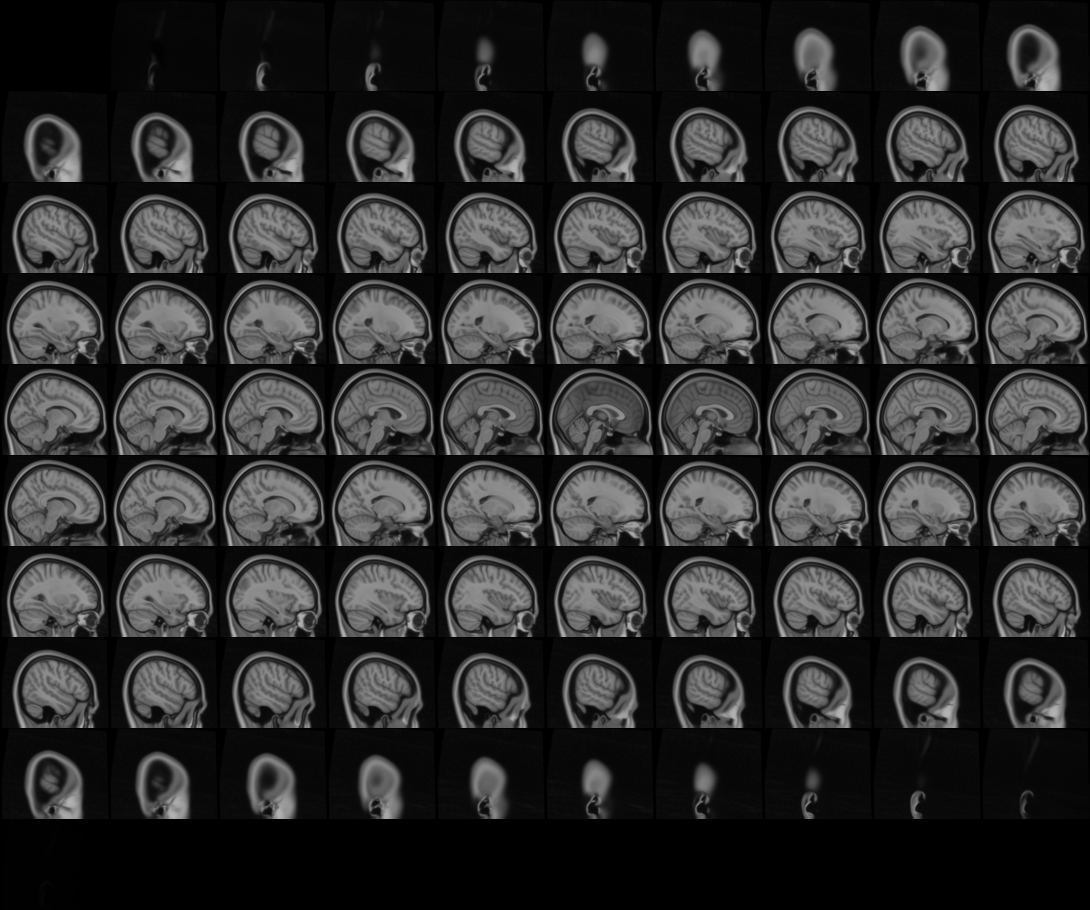
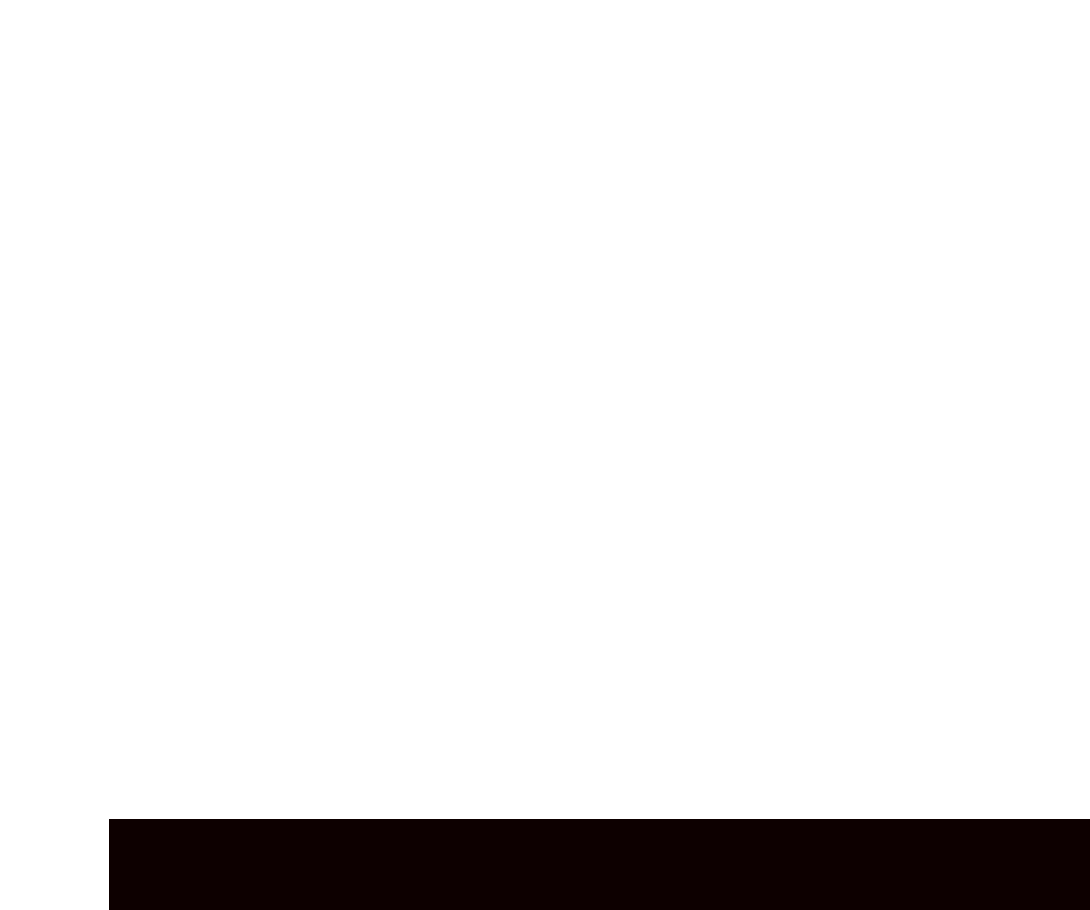

In [45]:
one_isc_result = np.zeros(1000)
one_isc_result[380] = 1  #note 920 here is definitely TPJ (overlap with neurosynth, can also look into others.)
one_isc_result[920] = 1 
isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
img = nilearn.plotting.view_img(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz');
img

In [34]:

season_vector


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [38]:
n_episodes = 280

season_onsets  = [0, 48, 96, 146, 190, 236]
season_offsets = season_onsets[1:] + [280]  # add final offset if needed
season_labels = []
for i, (start, end) in enumerate(zip(season_onsets, season_offsets)):
    season_labels.extend([i + 1] * (end - start))
season_vector = np.array(season_labels)

df_tpj = pd.DataFrame(isc_results[:, 920], columns = ['ISC'])
df_tpj['regions'] = ['TPJ'] * n_episodes
df_tpj['episodes'] = np.arange(280)+1
df_tpj['season'] = season_vector

df_ac = pd.DataFrame(isc_results[:, 545], columns = ['ISC'])
df_ac['regions'] = ['AC'] * n_episodes
df_ac['episodes'] = np.arange(280)+1
df_ac['season'] = season_vector

df_vc = pd.DataFrame(isc_results[:, 598], columns = ['ISC'])
df_vc['regions'] = ['VC'] * n_episodes
df_vc['episodes'] = np.arange(280)+1
df_vc['season'] = season_vector

df_all = pd.concat([df_tpj, df_ac, df_vc], ignore_index=True)
df_all.head()

,ISC,regions,episodes,season
0,0.098330,TPJ,1,1
1,0.114752,TPJ,2,1
2,0.121719,TPJ,3,1
3,0.034108,TPJ,4,1
4,0.107130,TPJ,5,1


In [45]:
mean_values = df_all.groupby(["season","regions"])["ISC"].mean()
mean_df = mean_values.reset_index()
mean_df

,season,regions,ISC
0,1,AC,0.170522
1,1,TPJ,0.109327
2,1,VC,0.304151
3,2,AC,0.183937
4,2,TPJ,0.098887
5,2,VC,0.339254
6,3,AC,0.147973
7,3,TPJ,0.098092
8,3,VC,0.309416
9,4,AC,0.163175


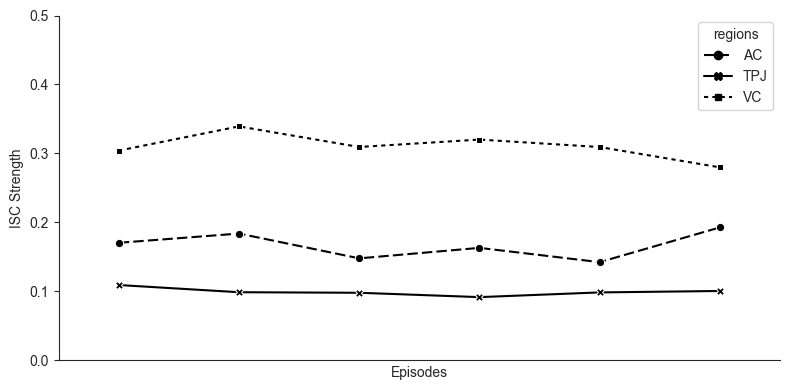

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')

custom_palette = {
    "TPJ": "#000000",  # pure black
    "AC":  "#000000",  # medium gray
    "VC":  "#000000"   # light gray
}
marker_styles = {
    "TPJ": "o",   # circle
    "AC": "s",   # square
    "VC": "D"    # diamond
}

line_styles = {
    "TPJ": "",           # solid line (no dashes)
    "AC": (5, 2),        # dashed
    "VC": (2, 2)         # dotted
}

plt.figure(figsize=(8, 4))

sns.lineplot(
    data=mean_df,
    x="season", y="ISC",
    hue="regions",
    style="regions",
    markers=True,
    dashes=line_styles,
    palette=custom_palette
)

plt.xlabel("Episodes")
plt.ylabel("ISC Strength")
plt.ylim(0, 0.5)  
plt.xlim([0.5,6.5])
plt.xticks([])
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


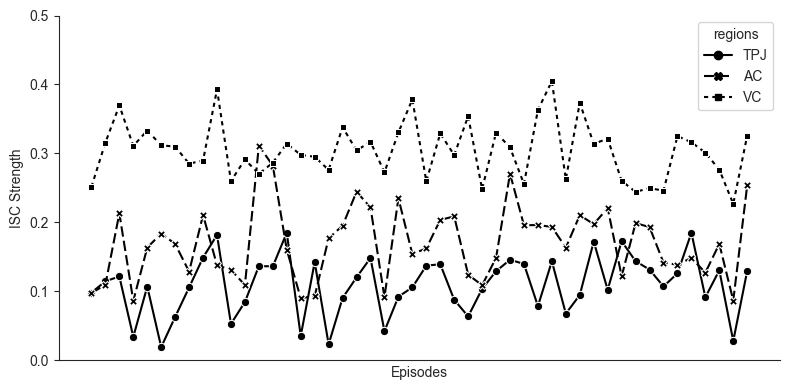

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')

custom_palette = {
    "TPJ": "#000000",  # pure black
    "AC":  "#000000",  #
    "VC":  "#000000"   # 
}
marker_styles = {
    "TPJ": "o",   # circle
    "AC": "s",   # square
    "VC": "D"    # diamond
}

line_styles = {
    "TPJ": "",           # solid line (no dashes)
    "AC": (5, 2),        # dashed
    "VC": (2, 2)         # dotted
}

df_select = df_all[df_all['season']==1]

plt.figure(figsize=(8, 4))

sns.lineplot(
    data=df_select,
    x="episodes", y="ISC",
    hue="regions",
    style="regions",
    markers=True,
    dashes=line_styles,
    palette=custom_palette
)

plt.xlabel("Episodes")
plt.ylabel("ISC Strength")
plt.ylim(0, 0.5)  
#plt.xlim([0.5,6.5])
plt.xticks([])
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


In [72]:
df_select = df_tpj[df_tpj['season']==1]
df_select

,ISC,regions,episodes,season
0,0.098330,TPJ,1,1
1,0.114752,TPJ,2,1
2,0.121719,TPJ,3,1
3,0.034108,TPJ,4,1
4,0.107130,TPJ,5,1
5,0.019383,TPJ,6,1
6,0.063086,TPJ,7,1
7,0.105834,TPJ,8,1
8,0.149134,TPJ,9,1
9,0.181922,TPJ,10,1
